**Background and Objective**


**Background**

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that customers will not be left behind.

Although only a little over 1 year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of customers who switch (churn) by using machine learning.

**Objective**

After yesterday we prepared the data as well as performed Cleansing, now it's time for us to create the right model to predict customer churn.

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **IMPORT LIBRARY AND UNLOADING FILE**

Import Library

The libraries used include: Pandas, Numpy, Matplotlib, Sklearn, Pickle, Pathlib

In [43]:
#Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
import pickle
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

**Unloading File**

What was done included:
*   pulls dqlab_telco_final file using pandas and renamed the file with the name `df_load`
*   observing the content (contents) of a data by looking at the number of columns and rows (data shape) --> `print('shape df_load ada {} baris dan {} kolom'.format(len(df_load.index),len(df_load.axes)))`
*   observing the top 5 rows of the data --> `print(df_load.head())`
*   find for the number of unique Customer IDs and view the total number of rows and their data types --> `df_load.info()`

In [44]:
import pandas as pd
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco_final.csv')

#Tampilkan bentuk dari dataset
print(df_load.shape)

#Tampilkan 5 data teratas
print(df_load.head())

#Tampilkan jumlah ID yang unik
print(df_load.customerID.nunique())

(6950, 13)
   UpdatedAt   customerID  gender SeniorCitizen Partner  tenure PhoneService  \
0     202006  45759018157  Female            No     Yes       1           No   
1     202006  45315483266    Male            No     Yes      60          Yes   
2     202006  45236961615    Male            No      No       5          Yes   
3     202006  45929827382  Female            No     Yes      72          Yes   
4     202006  45305082233  Female            No     Yes      56          Yes   

  StreamingTV InternetService PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No             Yes              Yes           29.85         29.85   
1          No              No              Yes           20.50       1198.80   
2         Yes             Yes               No          104.10        541.90   
3         Yes             Yes              Yes          115.50       8312.75   
4         Yes             Yes               No           81.25       4620.40   

  Churn  
0    No  
1    No

In [45]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


## **Exploratory Data Analysis (EDA)**

Exploratory data analysis (EDA) is used  to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

**Visualized Churn Percentage**

We want to see univariate data visualizations related to the percentage of churn data from customers. Use the `value_counts()` function to calculate the number of unique counts of a column, `pie()` to create a pie chart

Here are the results that should be produced:

In [46]:
churn_group = df_load.groupby('Churn').agg(target_cnt=('customerID','count')).sort_values(by='Churn', ascending=True).reset_index()
churn_group.style.background_gradient()

,Churn,target_cnt
0,No,5114
1,Yes,1836


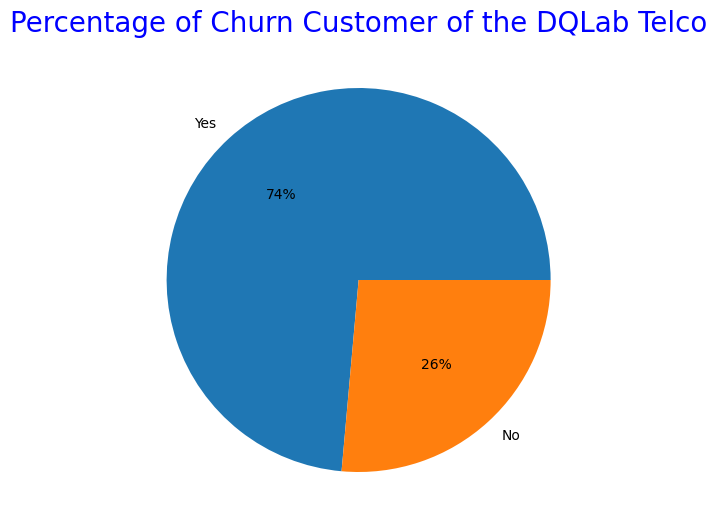

In [47]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Yes','No']
churn = df_load.Churn.value_counts()
ax.pie(churn, labels=labels, autopct= '%.0f%%')
plt.title(label = 'Percentage of Churn Customer of the DQLab Telco',
          size = 20,
          color = 'blue')
plt.show()

[Text(0, 0, '5114 (74%)'), Text(0, 0, '1836 (26%)')]

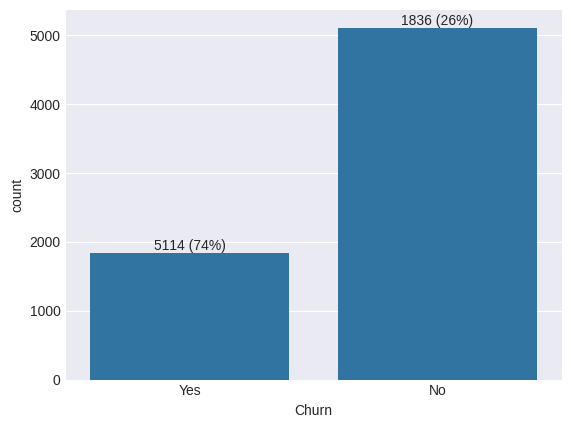

In [104]:
ax = sns.countplot(x=df_load['Churn'],
                   order=df_load['Churn'].value_counts(ascending=True).index);

abs_values = df_load['Churn'].value_counts(ascending=False)
rel_values = df_load['Churn'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)

**CONCLUSION**

Based on the result and analysis above it can be concluded that we can see that the overall data distribution of customers did not churn, with details of 26% `Churn` and 74% No `Churn` .

**Exploratory Data Analysis (EDA) of Numeric Variable**

What we will do next is to choose a predictor variable that is numerical in nature and make a bivariate plot, then interpret it

Use the `df_load` data to work on at this stage and use the `subplots()` function to generate the figures and a set of subplots.

Proper coding will produce the following output:
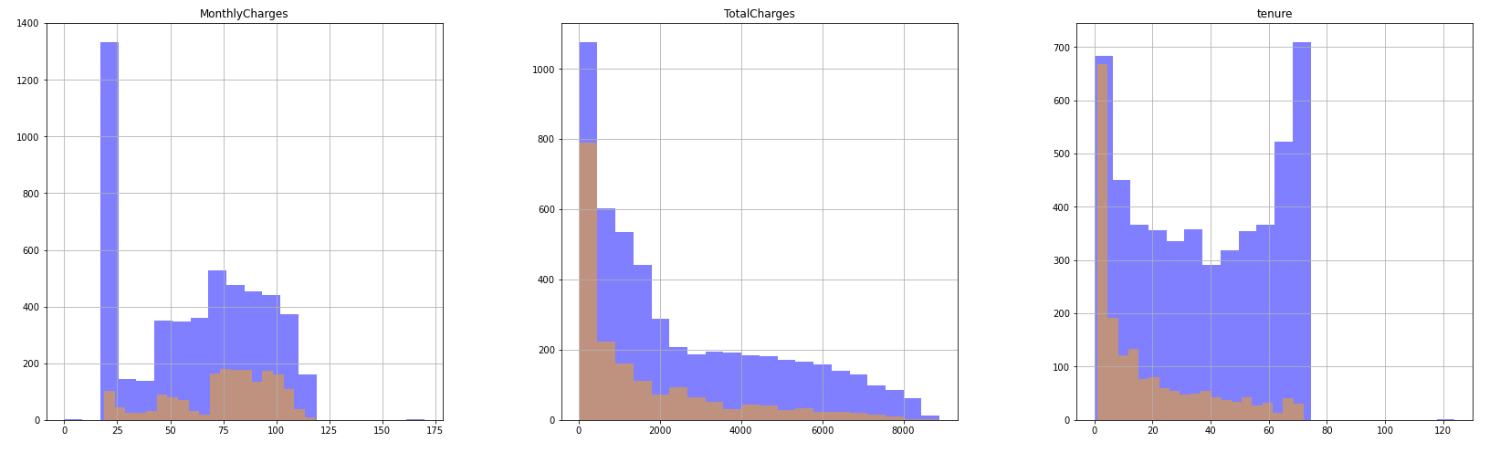

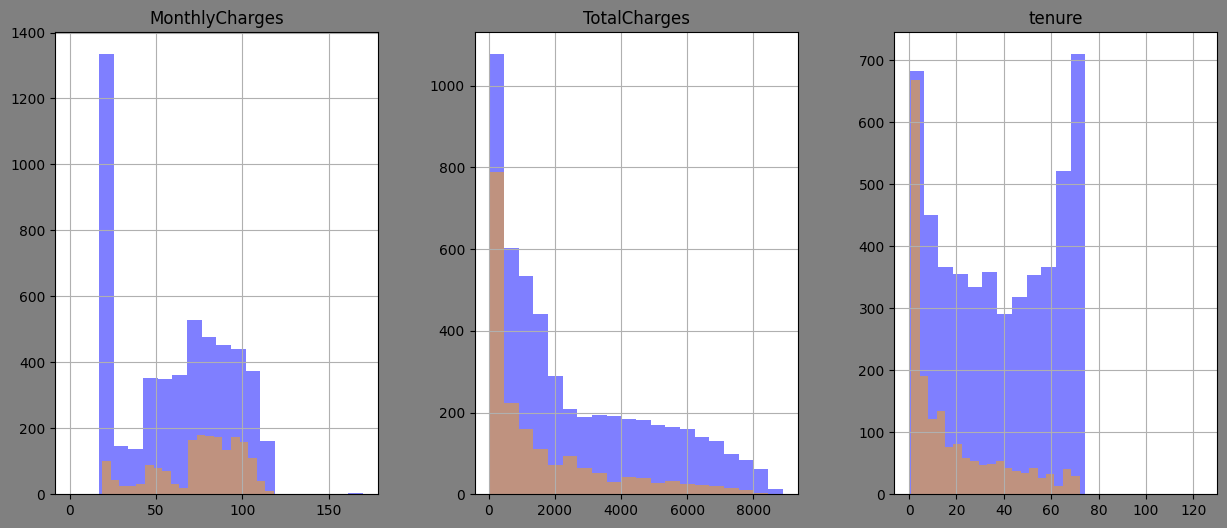

In [49]:
#creating bin in chart
numerical_features = ['MonthlyCharges','TotalCharges','tenure']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
fig.set_facecolor('grey')

# plot two overlays of histogram per each numerical_features, use a color of blue and orange, respectively
df_load[df_load.Churn == 'No'][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df_load[df_load.Churn == 'Yes'][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

**CONCLUSION**

Based on the result and analysis above it can be concluded that  `for MonthlyCharges there is a tendency that the smaller the value of the monthly fee charged, the smaller the tendency to make Churn`. `For TotalCharges there doesn't seem to be any tendency towards Churn customers`. `For tenure there is a tendency that the longer the customer subscribes, the less the tendency to churn`.

**Exploratory Data Analysis (EDA) of Categoric Variable**

After that, we will select a categorical predictor variable and make a bivariate plot, then interpret it

Use `df_load` data for processing at this stage. Use the `countplot()` function to create a plot with the number of observations in each bin of a categorical variable

The expected results are as follows.
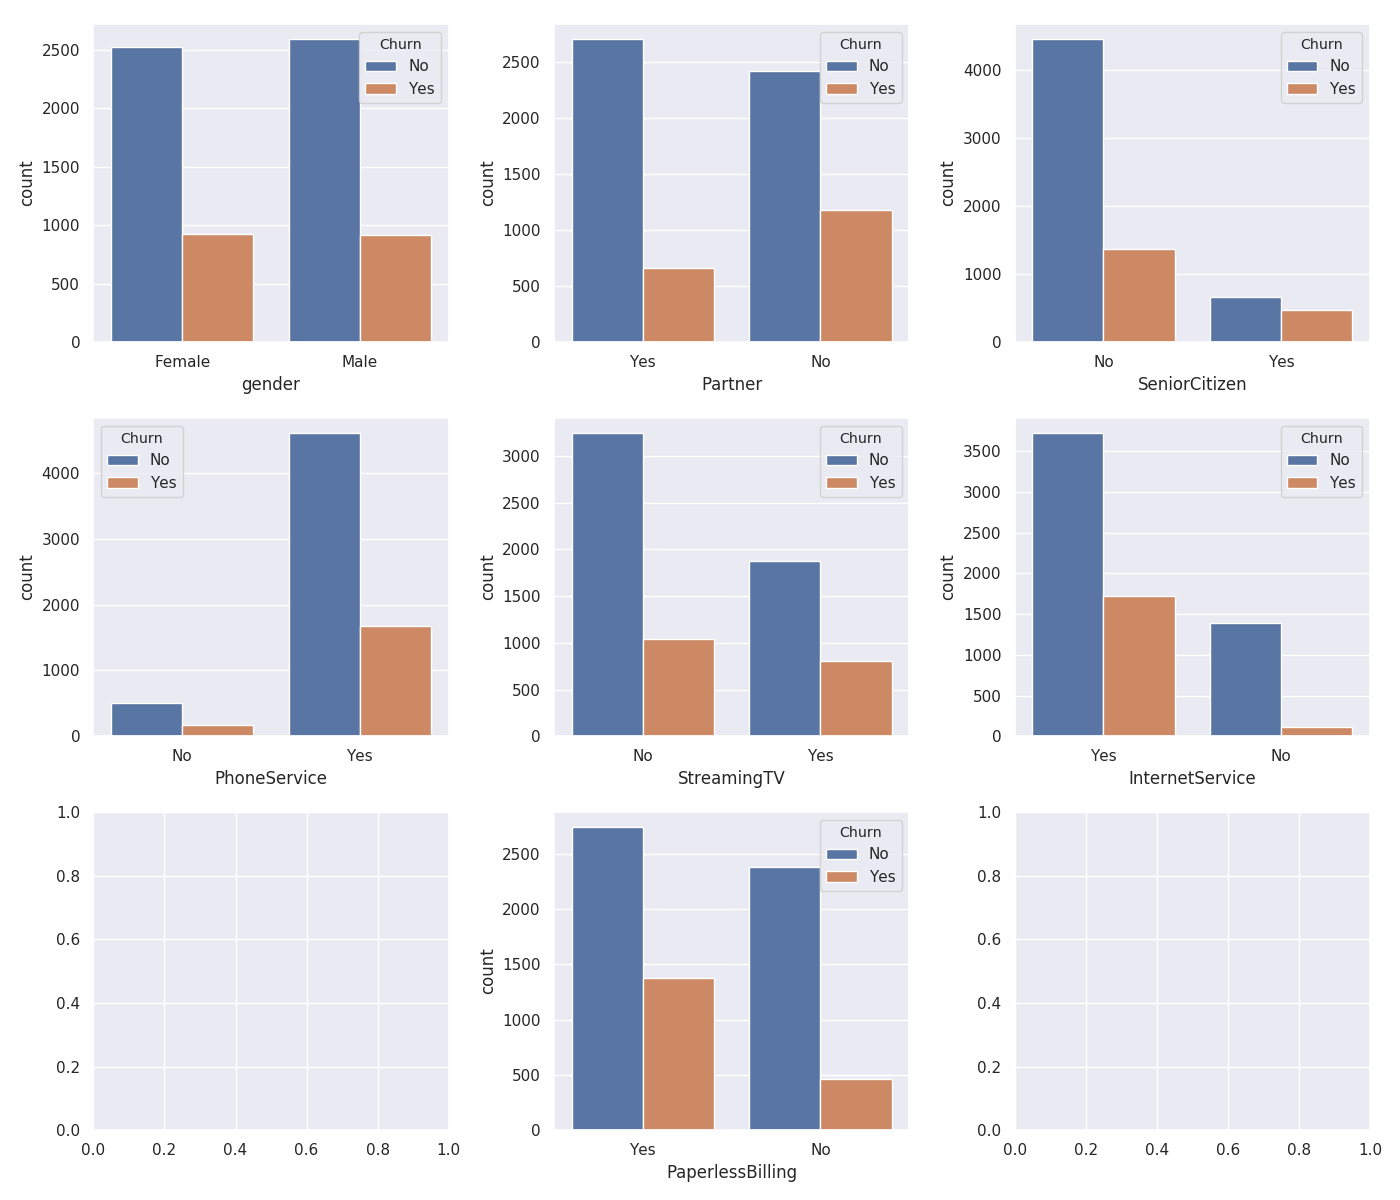

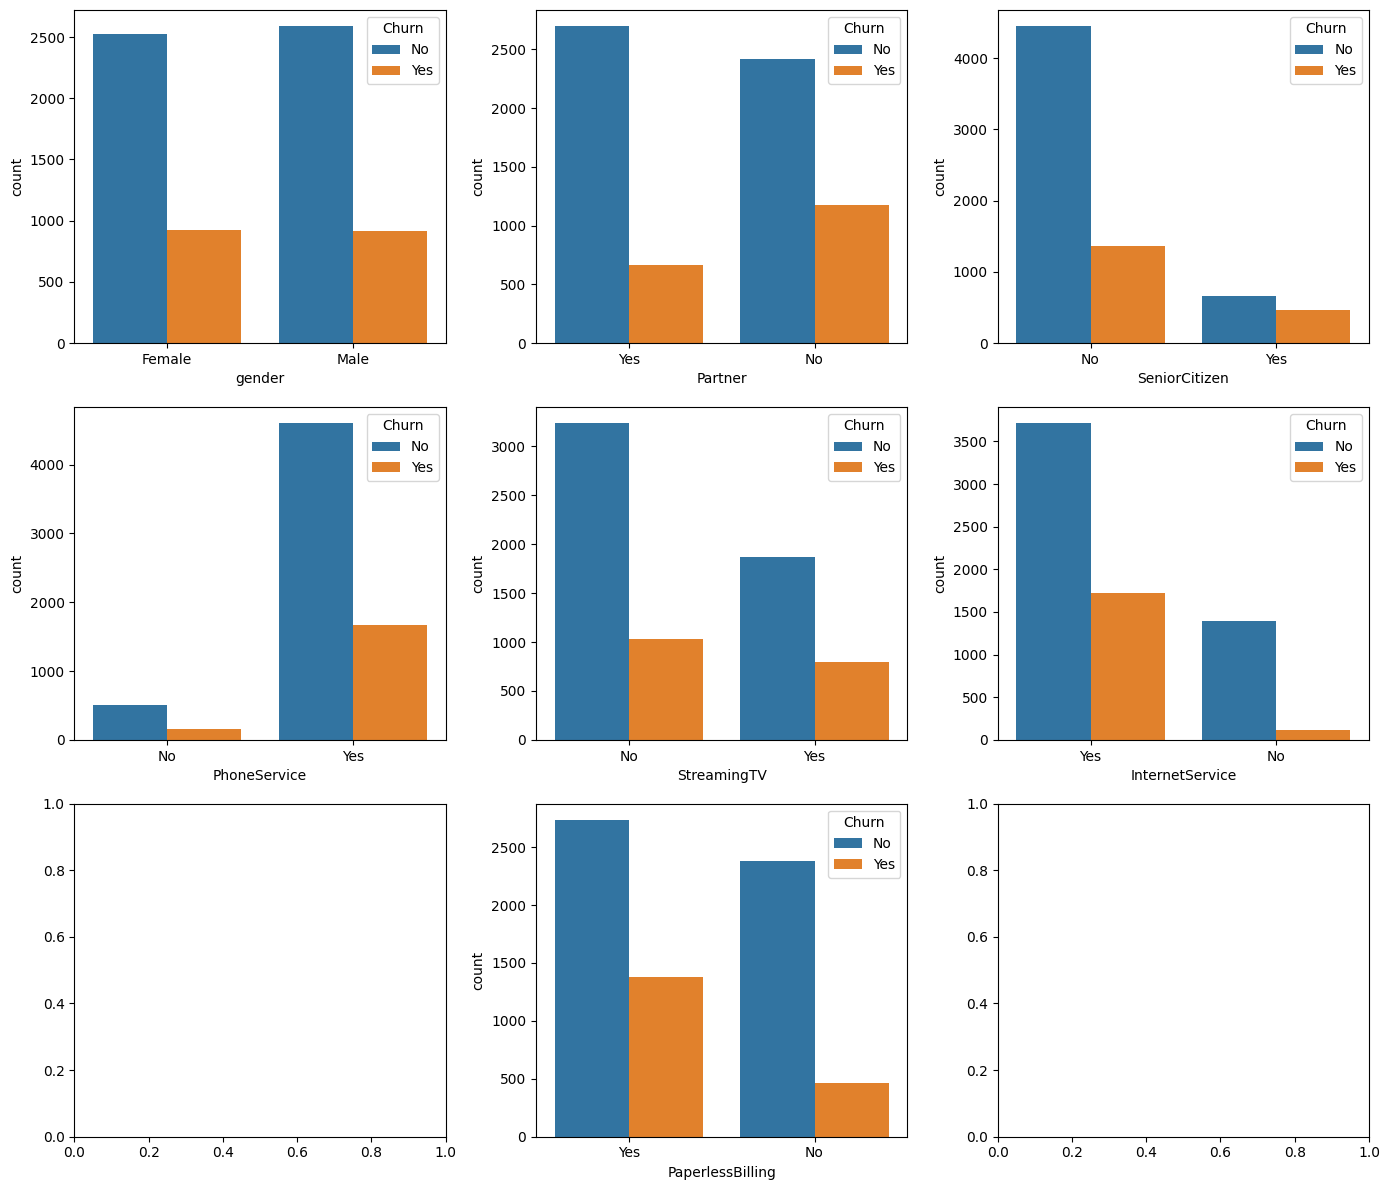

In [50]:
fig, ax = plt.subplots(3, 3, figsize=(14, 12))
sns.countplot(data=df_load, x='gender', hue='Churn', ax=ax[0][0])
sns.countplot(data=df_load, x='Partner', hue='Churn', ax=ax[0][1])
sns.countplot(data=df_load, x='SeniorCitizen', hue='Churn', ax=ax[0][2])
sns.countplot(data=df_load, x='PhoneService', hue='Churn', ax=ax[1][0])
sns.countplot(data=df_load, x='StreamingTV', hue='Churn', ax=ax[1][1])
sns.countplot(data=df_load, x='InternetService', hue='Churn', ax=ax[1][2])
sns.countplot(data=df_load, x='PaperlessBilling', hue='Churn', ax=ax[2][1])
plt.tight_layout()
plt.show()

**CONCLUSION**

Based on the result and analysis above it can be concluded that there is no significant difference for people who do churn in terms of gender and their telephone service `(PhoneService)`. However, there is a tendency that people who do Churn are people who don't have partners `(partner: No)`, people whose status is senior citizens `(SeniorCitizen: Yes)`, people who have TV streaming services` (StreamingTV: Yes)` , people who have Internet service` (internetService: Yes)` and people whose bills are paperless `(PaperlessBilling: Yes)`.

# **PreProcessing Data**

**Remove Unecessary Columns from the Data**

* Next we will delete the columns that will not be included in the modeling, then save them with the name `cleaned_df_train`
* Show the top 5 rows.
* Use `drop()` to remove a column from a data set

In [51]:
df_train=df_load.copy()

In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [53]:
#Remove the unnecessary columns customerID & UpdatedAt
cleaned_df_train = df_train.drop(['customerID','UpdatedAt'],axis=1)
cleaned_df_train.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [54]:
cleaned_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6950 non-null   object 
 1   SeniorCitizen     6950 non-null   object 
 2   Partner           6950 non-null   object 
 3   tenure            6950 non-null   int64  
 4   PhoneService      6950 non-null   object 
 5   StreamingTV       6950 non-null   object 
 6   InternetService   6950 non-null   object 
 7   PaperlessBilling  6950 non-null   object 
 8   MonthlyCharges    6950 non-null   float64
 9   TotalCharges      6950 non-null   float64
 10  Churn             6950 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 597.4+ KB


**Encoding Data**

Use the data from the previous results and analysis `cleaned_df_train`, to change the value of the data which is still in the form of strings to be converted into numeric form using `LabelEncoder()`. Use `describe()` to see a description of the data.

In [55]:
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df_train.columns:
    if cleaned_df_train[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df_train[column] = LabelEncoder().fit_transform(cleaned_df_train[column])
print(cleaned_df_train.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [56]:
cleaned_df_train.head()

,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,0,0,1,1,0,0,1,1,29.85,29.85,0
1,1,0,1,60,1,0,0,1,20.50,1198.80,0
2,1,0,0,5,1,1,1,0,104.10,541.90,1
3,0,0,1,72,1,1,1,1,115.50,8312.75,0
4,0,0,1,56,1,1,1,0,81.25,4620.40,0


In [57]:
# Predictor dan target
X = cleaned_df_train.drop('Churn', axis = 1)
y = cleaned_df_train['Churn']

In [58]:
# feature selection
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=True)

The features that correlate well with target feature:



,Features,Score
4,PhoneService,0.132760
0,gender,0.245201
5,StreamingTV,17.161634
6,InternetService,77.594269
2,Partner,79.166042
7,PaperlessBilling,104.580204
1,SeniorCitizen,131.823423
8,MonthlyCharges,3552.418938
3,tenure,16020.456546
9,TotalCharges,618595.546882


It can be seen which features correlate well with Churn.
1.   **Best features**: TotalCharges, tenure, MonthlyCharges
2.   **Worst features**: StreamingTV, gender, PhoneService

But, I will use all features to continue the analysis because the dataset has few features

**Splitting Dataset**

* Use data from previous results and analysis `df_train`, to divide the dataset into 2 parts (70% training & 30% testing) based on the predictor variable (X) and the target (Y).
* Use `train_test_split()` to split the data.
* Include value_counts to check whether the proportions are the same. Save the results of splitting data into `x_train`, `y_train`, `x_test` & `y_test`

In [59]:
# # create two different dataframe of majority and minority class
# df_major = cleaned_df_train[cleaned_df_train['Churn']==0]
# df_minor = cleaned_df_train[cleaned_df_train['Churn']==1]

# # upsample minority class
# df_minor_upsampled = resample(df_minor,
#                               replace=True,    # sample with replacement
#                               n_samples= 5114, # to match majority class
#                               random_state=42)  # reproducible results

# # combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_minor_upsampled, df_major])

In [60]:
# fig = plt.figure(figsize = (12,7))
# df_upsampled['Churn'].value_counts(normalize=True).plot(kind='bar', color= ['midnightblue','lightgrey'], alpha = 0.9, rot=0)
# plt.title('The Distribution of Customer Status\n', fontsize=14)
# plt.ylabel('Percentage of the Customers\n', fontsize=12)
# plt.xlabel('\nCustomer Status', fontsize=12)
# plt.show()

In [61]:
# # Predictor dan target
# X = df_upsampled.drop('Churn', axis = 1)
# y = df_upsampled['Churn']

# Splitting train and test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah:', x_train.shape,', sedangkan Jumlah baris dan kolom dari y_train adalah:', y_train.shape)

print('Prosentase Churn di data Training adalah:')
print(y_train.value_counts(normalize=True))

print('Jumlah baris dan kolom dari x_test adalah:', x_test.shape,', sedangkan Jumlah baris dan kolom dari y_test adalah:', y_test.shape)

print('Prosentase Churn di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: (4865, 10) , sedangkan Jumlah baris dan kolom dari y_train adalah: (4865,)
Prosentase Churn di data Training adalah:
Churn
0    0.734841
1    0.265159
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: (2085, 10) , sedangkan Jumlah baris dan kolom dari y_test adalah: (2085,)
Prosentase Churn di data Testing adalah:
Churn
0    0.738129
1    0.261871
Name: proportion, dtype: float64


In [62]:
# # normalize features
# scaler = StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.fit_transform(x_test)

**CONCLUSION**

After further analysis, it turns out that there are columns that are not needed in the model, namely the `customer ID number (customerID)` & `data collection period (UpdatedAt)`, so this needs to be deleted.

Then we continue to change the value of the data which is still in the form of a string to be numeric through encoding. After this is done, it can be seen that the distribution of the data, especially the min and max columns of each variable, has changed to 0 & 1.

The final stage is to divide the data into 2 parts for modeling purposes. after doing so it can be seen from the number of rows and columns of each data is appropriate & the percentage of column churn is also the same as the data at the beginning, this indicates that the data is properly and correctly separated.

# **Modelling: Logistic Regression**

Next we will create a model using the Logistic Regression Algorithm.
Use `LogisticRegression()`  to call the algorithm, fit it to the train data and save it as log_model


In [63]:
log_model = LogisticRegression(max_iter = 1000).fit(x_train, y_train)
print('Model Logistic Regression yang terbentuk adalah: \n', log_model)

Model Logistic Regression yang terbentuk adalah: 
 LogisticRegression(max_iter=1000)


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [64]:
# Predict
y_train_pred = log_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Logistic Regression):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      3575
           1       0.65      0.50      0.56      1290

    accuracy                           0.80      4865
   macro avg       0.74      0.70      0.72      4865
weighted avg       0.78      0.80      0.79      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

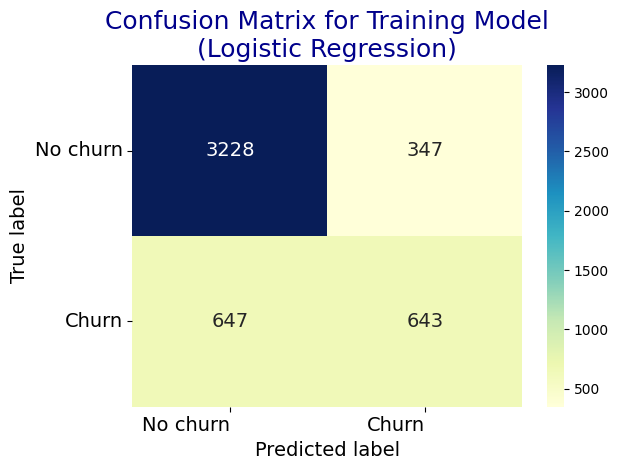

In [65]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No churn', 'Churn'), ('No churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Logistic Regression)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [66]:
# Predict
y_test_pred = log_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.73      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

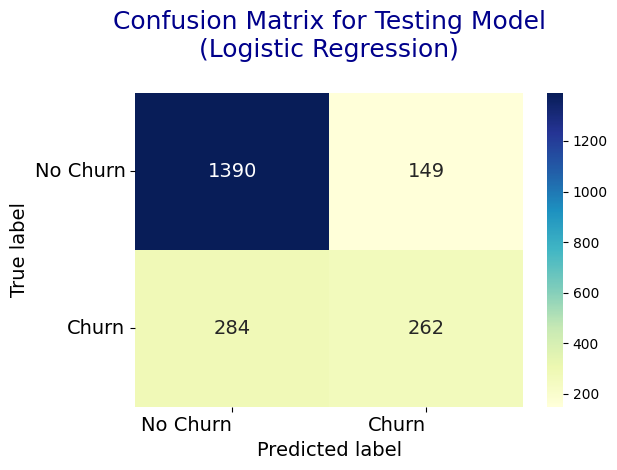

In [67]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)),('No Churn','Churn'),('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [68]:
acc_log_train=round(log_model.score(x_train,y_train)*100,2)
acc_log_test=round(log_model.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 79.57
Test Accuracy: % 79.23


In [69]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6915


**CONCLUSION**

From the results and analysis above, then:

* If we use the logistic regression algorithm by calling `LogisticRegression()`from sklearn without adding any parameters, then what is produced is a model with sklearn's default settings, details can be seen in the documentation.
* From the `training data` it can be seen that the model is able to predict the data by producing an accuracy of 80%, with details of guesses actually churn is `actually churn` is 643, guesses `not churn` that `actually not churn` 3228, guesses `not churn` which actually `churn` is 647 and guesses churn that `actually not churn` is 347.
* From the `data testing` it can be seen that the model is able to predict the data by producing an accuracy of 79%, with details of guesses actually churn is `actually churn` is 262, guesses not churn that `actually do not churn` is 1390, guesses not churn which `actually churn` is 284 and guesses churn that `actually not churn` is 149.

# **Modelling : Random Forest Classifier**

**Creating Model**

Next we will create a model using the Random Forest Classifier Algorithm.
* Use `RandomForestClassifier()`  to call the algorithm
* fit it to the train data and save it as `rdf_model`

In [70]:
#Train the model
rdf_model = RandomForestClassifier(random_state=42)
rdf_model.fit(x_train,y_train)
print(rdf_model)

RandomForestClassifier(random_state=42)


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [71]:
y_train_pred = rdf_model.predict(x_train)
print('Classification Report Training Model (Random Forest Classifier):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3575
           1       1.00      0.99      0.99      1290

    accuracy                           1.00      4865
   macro avg       1.00      0.99      0.99      4865
weighted avg       1.00      1.00      1.00      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

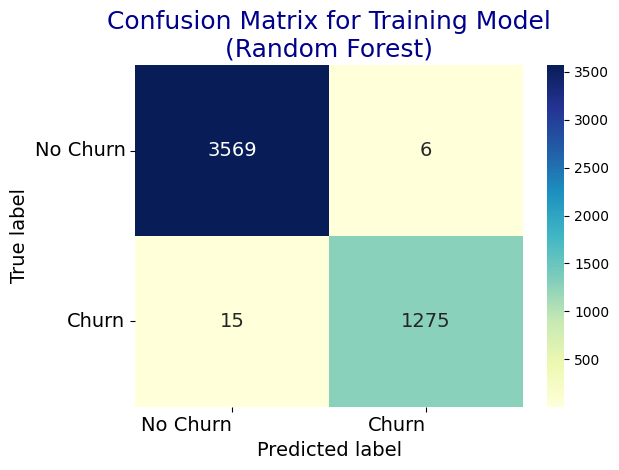

In [72]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn','Churn'), ('No Churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [73]:
# Predict
y_test_pred = rdf_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1539
           1       0.58      0.48      0.52       546

    accuracy                           0.77      2085
   macro avg       0.70      0.68      0.69      2085
weighted avg       0.76      0.77      0.77      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

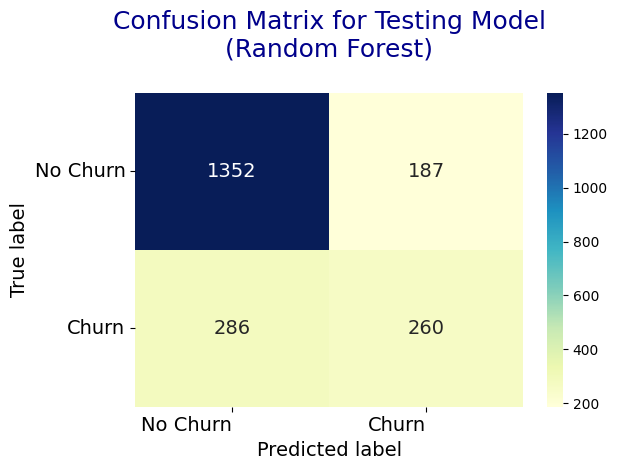

In [74]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [75]:
acc_rdf_train=round(rdf_model.score(x_train,y_train)*100,2)
acc_rdf_test=round(rdf_model.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rdf_train))
print("Test Accuracy: % {}".format(acc_rdf_test))

Training Accuracy: % 99.57
Test Accuracy: % 77.31


In [76]:
# ROC scores
roc_auc_rdf = round(roc_auc_score(y_test, y_test_pred),4)
print('ROC AUC:', roc_auc_rdf)

ROC AUC: 0.6773


**CONCLUSION**

From the results and analysis above, then:

* If we use the Random Forest algorithm by calling `RandomForestClassifier()` from sklearn without adding any parameters, then what is produced is a model with default settings from sklearn, details can be seen in the documentation.
* From the training data it can be seen that the model is able to predict the data by producing an `accuracy of 100%`, with details of guesses actually Churn that is `actually Churn` is 1277, guesses not churn that is `actually not churn` is 3567, guesses not churn actually that is `churn` is 13 and guesses churn that is `actually not churn` is 8.
* From the data testing it can be seen that the model is able to predict the data by producing an `accuracy of 77%`, with details of guesses actually churn is `actually churn` is 255, guesses not churn that `actually not churn` is 1353, guesses not churn which `actually churn` is 291 and guesses churn that `actually not churn` is 186.




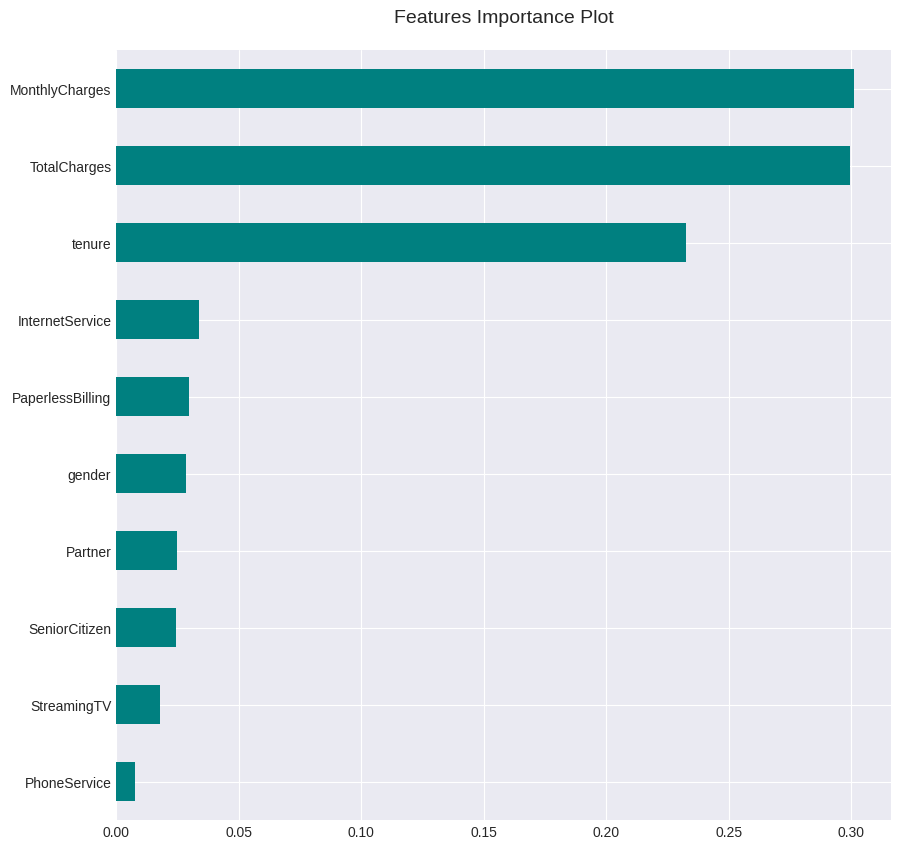

In [77]:
# important features
importances_rf = pd.Series(rdf_model.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='teal')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')

# **Modelling: Gradient Boosting Classifier**

The next model can be made using the Gradient Boosting Classifier Algorithm.


* Use `GradientBoostingClassifier()`  to call the algorithm
* fit it to the train data and save it as `gbt_model`

In [78]:
#Train the model
gbt_model=GradientBoostingClassifier().fit(x_train,y_train)
print(gbt_model)

GradientBoostingClassifier()


**Training Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the training data use `classification_report()`

In [79]:
# Predict
y_train_pred = gbt_model.predict(x_train)
# Print classification report
print('Classification Report Training Model (Gradient Boosting):')
print(classification_report(y_train,y_train_pred))

Classification Report Training Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3575
           1       0.70      0.53      0.60      1290

    accuracy                           0.82      4865
   macro avg       0.77      0.72      0.74      4865
weighted avg       0.81      0.82      0.81      4865



**Training Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

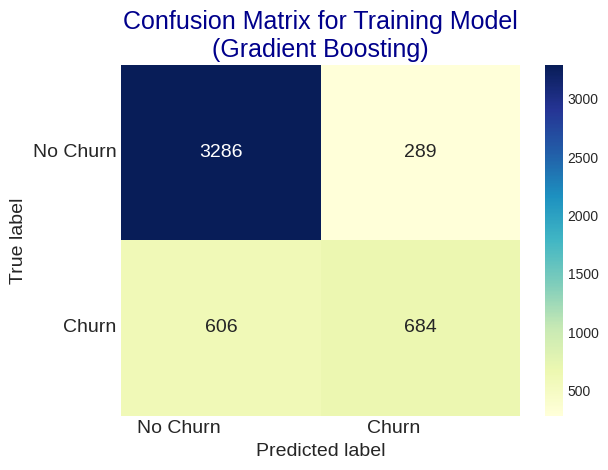

In [80]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_train,y_train_pred)), ('No Churn', 'Churn'), ('No Churn','Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

**Testing Model Performance - Displaying Metrics**

After we create the model, then do the calculations to get the classification report on the data testing use `classification_report()`

In [81]:
# Predict
y_test_pred = gbt_model.predict(x_test)
# Print classification report
print('Classification Report Testing Model (Gradient Boosting):')
print(classification_report(y_test,y_test_pred))

Classification Report Testing Model (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1539
           1       0.64      0.48      0.55       546

    accuracy                           0.79      2085
   macro avg       0.74      0.69      0.71      2085
weighted avg       0.78      0.79      0.78      2085



**Testing Model Performance - Displaying Plots**

After getting the results of the classification report in the previous stage, we can also display the confusion matrix for data testing. This confusion matrix is ​​obtained using the `confusion_matrix` and can be visualized using a heatmap from `seaborn`.

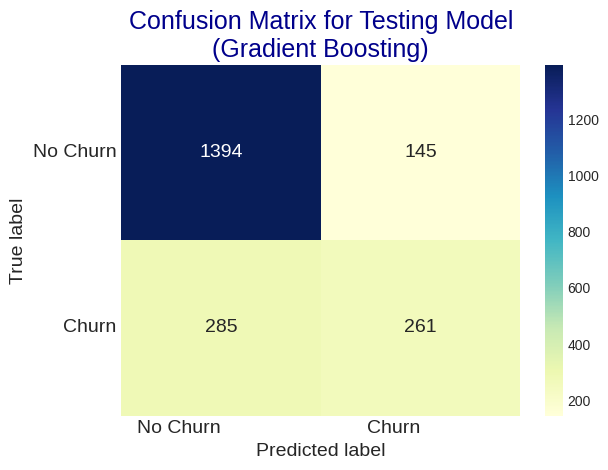

In [82]:
# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame((confusion_matrix(y_test,y_test_pred)), ('No Churn','Churn'), ('No Churn', 'Churn'))

# Plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Gradient Boosting)', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.tight_layout()
plt.show()

In [83]:
acc_gbt_train=round(gbt_model.score(x_train,y_train)*100,2)
acc_gbt_test=round(gbt_model.score(x_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_gbt_train))
print("Test Accuracy: % {}".format(acc_gbt_test))

Training Accuracy: % 81.6
Test Accuracy: % 79.38


In [84]:
# ROC scores
roc_auc_gbt = round(roc_auc_score(y_test, y_test_pred),4)
print('ROC AUC:', roc_auc_gbt)

ROC AUC: 0.6919


**CONCLUSION**

From the results and analysis above, then:

* If we use the Gradient Boosting algorithm by calling `GradientBoostingClassifier()` from the sklearn package without adding any parameters, then what is produced is a model with sklearn's default settings, details can be seen in the documentation.
* From the training data it can be seen that the model is able to predict the data by producing an accuracy of 82%, with details of guesses actually churn that is `actually churn` is 684, guesses not churn that is `actually not churn` is 3286, guesses not churn which actually churn is 606 and guesses churn that actually not churn is 289.
* From the data testing it can be seen that the model is able to predict the data by producing an accuracy of 79%, with details of guesses actually churn is `actually churn` is 261, guesses not churn that `actually not churn` is 1394, guesses not churn which `actually churn` is 285 and guesses churn that
`actually not churn` is 145.



# **Determining the Best Model Algorithm**

A good model is a model that is able to provide good performance in the training and testing phases of the model.

* `Over-fitting` is a condition where the model is able to predict very well in the training phase, but is unable to predict as well in the testing phase.
* `Under-Fitting` is a condition where the model is unable to predict well in the training phase, but is able to predict well in the testing phase.
* `Appropriate-Fitting` is a condition where the model is able to predict well both in the training phase and in the testing phase.

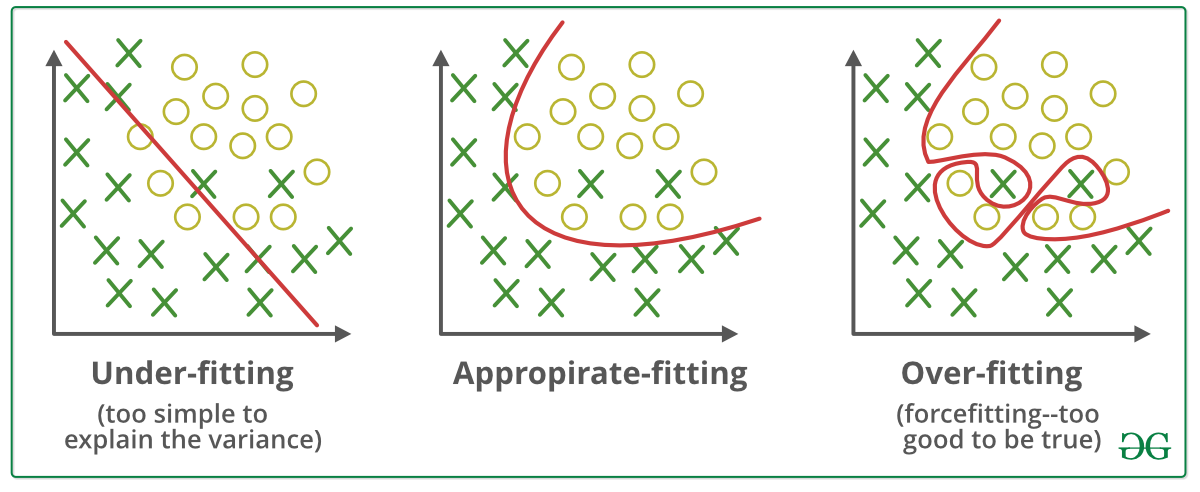

Next, we will determine the best algorithm model from the model that has been done above (Appropriate-Fitting), then we save it as the best_model_churn.pkl file with the aim of deploying the model later. We don't need to repeat the modeling again, just call the file. Save it in the file directory according to the dataset, then check whether the file is saved or not. Use dump() from pickle to save the file. You can use the code below to save the model file to try on your own local laptop.

`pickle.dump(log_model, open('best_model_churn.pkl', 'wb'))`



Model Selection

In [85]:
results = pd.DataFrame([["Logistic Regression", 0.7957, 0.7923, 0.6915],["Random Forest", 0.9957, 0.7799, 0.6831],["Gradient Boosting Classifier", 0.816, 0.7938, 0.6919]],
                        columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"]).reset_index(drop=True)

results.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='mako')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
1,Random Forest,0.995700,0.779900,0.683100
2,Gradient Boosting Classifier,0.816000,0.793800,0.691900
0,Logistic Regression,0.795700,0.792300,0.691500


The prediction accuracy of the train and test data in **Random Forest** model has a value that is not much different, it can be said that the model is very good, which is there is no underfitting or overfitting. So the **Random Forest** model was chosen as the best model to predict client’s repayment abilities.

**Prediction**

In [86]:
df_test = df_load.copy()

In [87]:
print('The number of duplication is:', df_test.duplicated().sum())
# there is no duplication

The number of duplication is: 0


In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [89]:
df_test.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,tenure,PhoneService,StreamingTV,InternetService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,No,Yes,1,No,No,Yes,Yes,29.85,29.85,No
1,202006,45315483266,Male,No,Yes,60,Yes,No,No,Yes,20.50,1198.80,No
2,202006,45236961615,Male,No,No,5,Yes,Yes,Yes,No,104.10,541.90,Yes
3,202006,45929827382,Female,No,Yes,72,Yes,Yes,Yes,Yes,115.50,8312.75,No
4,202006,45305082233,Female,No,Yes,56,Yes,Yes,Yes,No,81.25,4620.40,No


In [90]:
# check for empty elements
print('Missing values status:', df_test.isnull().values.any())
df_null = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
df_null['Percentage'] = (df_null['Total Null Values']/df_test.shape[0])*100
df_null = df_null.sort_values(by=['Percentage'], ascending=False).reset_index()
df_null

Missing values status: False


,index,Total Null Values,Percentage
0,UpdatedAt,0,0.0
1,customerID,0,0.0
2,gender,0,0.0
3,SeniorCitizen,0,0.0
4,Partner,0,0.0
5,tenure,0,0.0
6,PhoneService,0,0.0
7,StreamingTV,0,0.0
8,InternetService,0,0.0
9,PaperlessBilling,0,0.0


In [91]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6950 entries, 0 to 6949
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6950 non-null   int64  
 1   customerID        6950 non-null   int64  
 2   gender            6950 non-null   object 
 3   SeniorCitizen     6950 non-null   object 
 4   Partner           6950 non-null   object 
 5   tenure            6950 non-null   int64  
 6   PhoneService      6950 non-null   object 
 7   StreamingTV       6950 non-null   object 
 8   InternetService   6950 non-null   object 
 9   PaperlessBilling  6950 non-null   object 
 10  MonthlyCharges    6950 non-null   float64
 11  TotalCharges      6950 non-null   float64
 12  Churn             6950 non-null   object 
dtypes: float64(2), int64(3), object(8)
memory usage: 706.0+ KB


In [92]:
#Encoding Features
cleaned_df_test = df_test.drop(['customerID','UpdatedAt'], axis=1)

from sklearn.preprocessing import LabelEncoder
#Convert all the non-numeric columns to numerical data types
for column in cleaned_df_test.columns:
    if cleaned_df_test[column].dtype == np.number: continue
    # Perform encoding for each non-numeric column
    cleaned_df_test[column] = LabelEncoder().fit_transform(df_test[column])
print(cleaned_df_test.describe())

            gender  SeniorCitizen      Partner       tenure  PhoneService  \
count  6950.000000    6950.000000  6950.000000  6950.000000   6950.000000   
mean      0.504317       0.162302     0.483309    32.415827      0.903741   
std       0.500017       0.368754     0.499757    24.561336      0.294967   
min       0.000000       0.000000     0.000000     0.000000      0.000000   
25%       0.000000       0.000000     0.000000     9.000000      1.000000   
50%       1.000000       0.000000     0.000000    29.000000      1.000000   
75%       1.000000       0.000000     1.000000    55.000000      1.000000   
max       1.000000       1.000000     1.000000    73.000000      1.000000   

       StreamingTV  InternetService  PaperlessBilling  MonthlyCharges  \
count  6950.000000      6950.000000       6950.000000     6950.000000   
mean      0.384317         0.783453          0.591942       64.992201   
std       0.486468         0.411921          0.491509       30.032040   
min       0.00

In [93]:
pred_test = cleaned_df_test.drop('Churn', axis = 1)

In [94]:
# lets predict!
predict = pd.Series(rdf_model.predict(pred_test), name = 'Churn').astype(int)
results = pd.concat([df_test['customerID'], predict],axis = 1)
results.rename(columns = {'Churn':'Churn_pred'}, inplace = True)
results.sort_values(by='Churn_pred',ascending=True).reset_index(drop=True)

,customerID,Churn_pred
0,45759018157,0
1,45948027059,0
2,45897014235,0
3,45186652648,0
4,45325381512,0
...,...,...
6945,45454183827,1
6946,45988903187,1
6947,45837437500,1
6948,45517823356,1


In [95]:
results_summary = results.groupby('Churn_pred').agg(customer_cnt=('customerID','count')).reset_index()
results_summary['Churn_Meaning'] = ['No','Yes']
results_summary = results_summary[['Churn_pred','Churn_Meaning','customer_cnt']]
print('Churn Customer after predicted :')
results_summary

Churn Customer after predicted :


,Churn_pred,Churn_Meaning,customer_cnt
0,0,No,5222
1,1,Yes,1728
